In [26]:
import pandas as pd
df = pd.read_csv("4_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [28]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [30]:
df.drop(columns=["area_type"], axis=1, inplace=True)
df

,availability,location,size,society,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [36]:
df = df.dropna(subset=['size'])

In [38]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df

,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,5
13316,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,4
13317,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2
13318,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,4


In [40]:
df = df[df['bhk'] > 10]

In [42]:
def convert_sqrt_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    try:
      return ((float(tokens[0]) + float(tokens[1]))/2)
    except ValueError:
      return None
  try:
    return float(x)
  except ValueError:
    return None


In [44]:
result = convert_sqrt_to_num('2100 - 2850')
print(result)

2475.0


In [46]:
df = df[df['total_sqft'].apply(lambda x: convert_sqrt_to_num(x) is not None)]

In [48]:
df['total_sqft'].unique()

array(['5000', '8000', '1200', '2000', '10000', '2400', '1250', '2232',
       '6000', '5425'], dtype=object)

In [50]:
def isFloat(x):
  try:
    float(x)
    return True
  except (ValueError, TypeError):
    return False

In [52]:
df[~df['total_sqft'].apply(lambda x: isFloat(x))]

,availability,location,size,society,total_sqft,bath,balcony,price,bhk


In [54]:
df['total_sqft'] = df['total_sqft'].astype(float)

In [56]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

In [58]:
df

,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
459,Ready To Move,1 Giri Nagar,11 BHK,Bancyri,5000.0,9.0,3.0,360.0,11,7200.000000
1718,Ready To Move,2Electronic City Phase II,27 BHK,NaN,8000.0,27.0,0.0,230.0,27,2875.000000
1768,Ready To Move,1 Ramamurthy Nagar,11 Bedroom,NaN,1200.0,11.0,0.0,170.0,11,14166.666667
3379,Ready To Move,1Hanuman Nagar,19 BHK,NaN,2000.0,16.0,NaN,490.0,19,24500.000000
3609,Ready To Move,Koramangala Industrial Layout,16 BHK,NaN,10000.0,16.0,NaN,550.0,16,5500.000000
3853,Ready To Move,1 Annasandrapalya,11 Bedroom,NaN,1200.0,6.0,3.0,150.0,11,12500.000000
4684,Ready To Move,Munnekollal,43 Bedroom,NaN,2400.0,40.0,0.0,660.0,43,27500.000000
4916,Ready To Move,1Channasandra,14 BHK,NaN,1250.0,15.0,0.0,125.0,14,10000.000000
6533,Ready To Move,Mysore Road,12 Bedroom,NaN,2232.0,6.0,2.0,300.0,12,13440.860215
7979,Ready To Move,1 Immadihalli,11 BHK,NaN,6000.0,12.0,NaN,150.0,11,2500.000000


In [60]:
import matplotlib.pyplot as plt

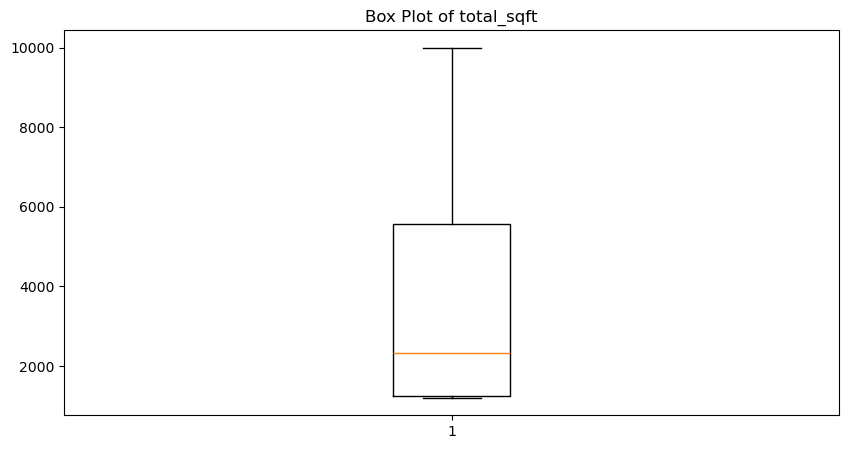

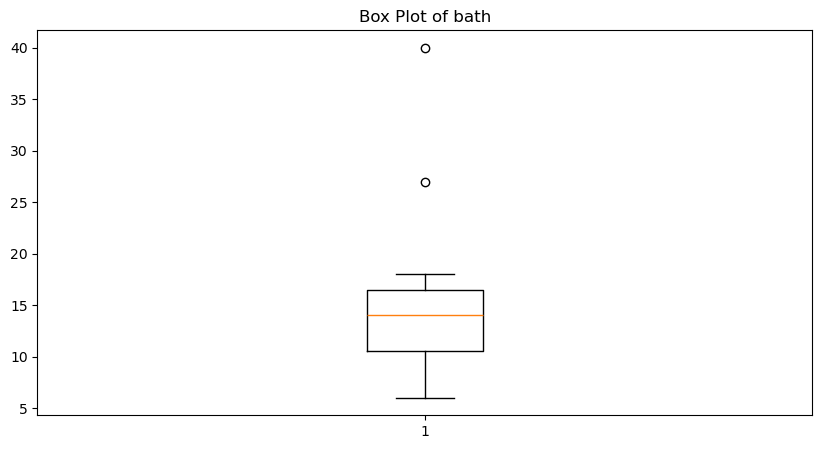

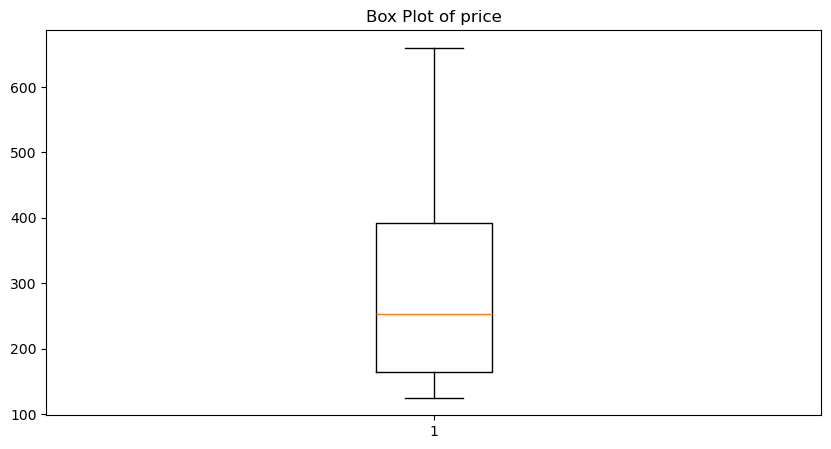

In [62]:
columns = ['total_sqft', 'bath', 'price']

for column in columns:
  fig, ax = plt.subplots(figsize=(10,5))
  ax.boxplot(df[column])
  ax.set_title(f"Box Plot of {column}")
  plt.show()

In [64]:

def remove_outlier(column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [66]:
df = remove_outlier('bath')
df

,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
459,Ready To Move,1 Giri Nagar,11 BHK,Bancyri,5000.0,9.0,3.0,360.0,11,7200.000000
1768,Ready To Move,1 Ramamurthy Nagar,11 Bedroom,NaN,1200.0,11.0,0.0,170.0,11,14166.666667
3379,Ready To Move,1Hanuman Nagar,19 BHK,NaN,2000.0,16.0,NaN,490.0,19,24500.000000
3609,Ready To Move,Koramangala Industrial Layout,16 BHK,NaN,10000.0,16.0,NaN,550.0,16,5500.000000
3853,Ready To Move,1 Annasandrapalya,11 Bedroom,NaN,1200.0,6.0,3.0,150.0,11,12500.000000
4916,Ready To Move,1Channasandra,14 BHK,NaN,1250.0,15.0,0.0,125.0,14,10000.000000
6533,Ready To Move,Mysore Road,12 Bedroom,NaN,2232.0,6.0,2.0,300.0,12,13440.860215
7979,Ready To Move,1 Immadihalli,11 BHK,NaN,6000.0,12.0,NaN,150.0,11,2500.000000
9935,Ready To Move,1Hoysalanagar,13 BHK,NaN,5425.0,13.0,0.0,275.0,13,5069.124424
11559,18-Apr,1Kasavanhalli,18 Bedroom,HMwerCo,1200.0,18.0,NaN,200.0,18,16666.666667


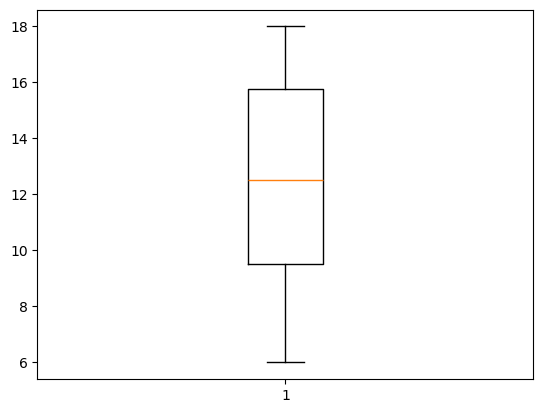

In [68]:
plt.boxplot(df['bath'])
plt.show()